### Identifying poisonous mushroom - 


The mushrooms excel file consist of different features about mushrooms. It contains the class, cap-shape, cap-surface, cap-color, odor, etc. all recorded in a string format. Using the decision tree, we'll decide which features contributes most to the poisonous mushroom. We'll validate the findings using the Classification Report (F1, recall, etc.) and the Confusion Matrix.

In [60]:
# Import libraries
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [61]:
df = pd.read_excel("mushrooms.xlsx") #File read

#### Exploratory Analysis

In [62]:
#Column Names 
df.columns.values

array(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises',
       'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat'], dtype=object)

In [63]:
df.head() #First 5 - Overview of the dataset 
## Data - List of Categorical Variables

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [64]:
#Describing the dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Goal is to create a model that predicts mushroom edibility based on their distinctive attributes using a decision tree. 'Class' column represents information on the edible status and will serve as our target variable. Given the total number of instances in the dataset is 8124 and 'e' appears as the top value in the class column, we can infer more than half of all mushrooms are considered edible.

In [65]:
df = df.drop(['veil-type'],axis = 1) #Dropping unnecessary column -- Veil only provides information on one category and thus, no use.

In [66]:
# Rows / Columns - 8124 instances, 23 columns    
df.shape 

(8124, 22)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [68]:
#Null Values
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat


### Examining target variable: Class

In [84]:
class_percentages = df['class'].value_counts(normalize=True).mul(100).round(2)
for index, values in class_percentages.items():
    print(f"{index}: {values}%")

#Almost evenly split between edible and poisonous

0: 51.8%
1: 48.2%


<AxesSubplot:xlabel='class', ylabel='Count'>

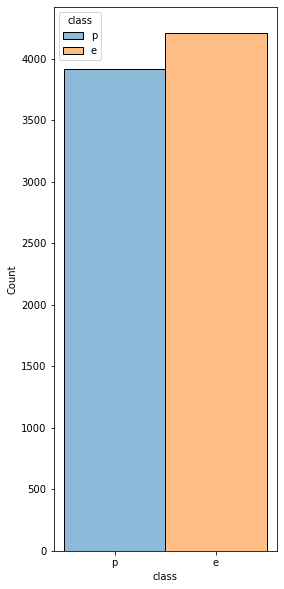

In [70]:
plt.figure(figsize=(4, 10))
sns.histplot(data = df, x = "class", hue = "class", discrete = True, element = "bars")

### Decision Tree

In [71]:
from sklearn.preprocessing import LabelEncoder

# To ordinal for data manipulation
labelencoding = LabelEncoder()
for column in df.columns:
    df[column] = labelencoding.fit_transform(df[column])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [72]:
x = df.drop(['class'], axis=1).values
y = df['class'].values

In [73]:
#Splitting the Dataset into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [74]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5686, 21), (2438, 21), (5686,), (2438,))

[Text(0.5, 0.875, 'X[8] <= 3.5\ngini = 0.499\nsamples = 5686\nvalue = [2972, 2714]'),
 Text(0.25, 0.625, 'X[19] <= 3.5\ngini = 0.279\nsamples = 2290\nvalue = [383, 1907]'),
 Text(0.125, 0.375, 'X[18] <= 1.5\ngini = 0.222\nsamples = 409\nvalue = [357, 52]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.1875, 0.125, 'gini = 0.087\nsamples = 374\nvalue = [357, 17]'),
 Text(0.375, 0.375, 'X[10] <= 2.0\ngini = 0.027\nsamples = 1881\nvalue = [26, 1855]'),
 Text(0.3125, 0.125, 'gini = 0.011\nsamples = 1865\nvalue = [10, 1855]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.625, 'X[18] <= 1.5\ngini = 0.362\nsamples = 3396\nvalue = [2589, 807]'),
 Text(0.625, 0.375, 'X[10] <= 0.5\ngini = 0.22\nsamples = 500\nvalue = [63, 437]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 437\nvalue = [0, 437]'),
 Text(0.875, 0.375, 'X[7] <= 0.5\ngini = 0.223\nsamples = 2896\nvalu

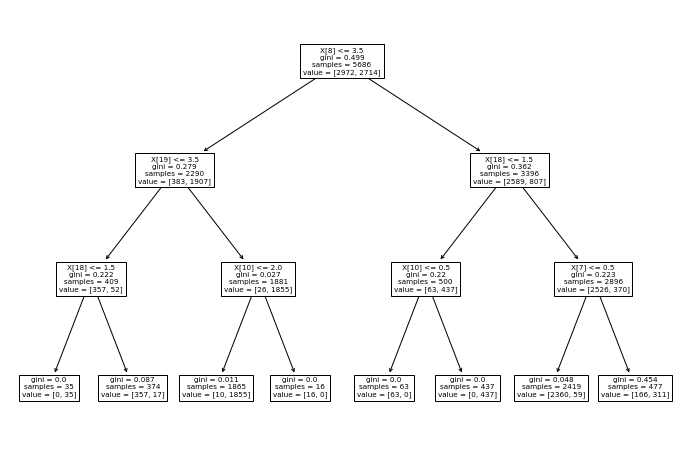

In [75]:
#Decision Tree - Max depth = 3 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
dt_gini.fit(x_train, y_train)

plt.figure(figsize = (12,8))
tree.plot_tree(dt_gini.fit(x_train, y_train))

In [85]:
#Validating Overfitting (When the model is trained too well on the data, resulting in high accuracy for the training set and low accuracy for the test set.)
from sklearn.metrics import accuracy_score

y_acc_test_gini = dt_gini.predict(x_test)
y_acc_train_gini = dt_gini.predict(x_train)

print("Test Accuracy Percentage for the model: {}%".format(round(dt_gini.score(x_test,y_test)*100,2)))
print('Training Set Accuracy Percentage for the model: {0:0.2f}%'.format(accuracy_score(y_train, y_acc_train_gini)*100))

#Results point to a balanced accuracy

Test Accuracy Percentage for the model: 96.55%
Training Set Accuracy Percentage for the model: 95.57%


## Validation with Confusion Matrix - Decision Tree

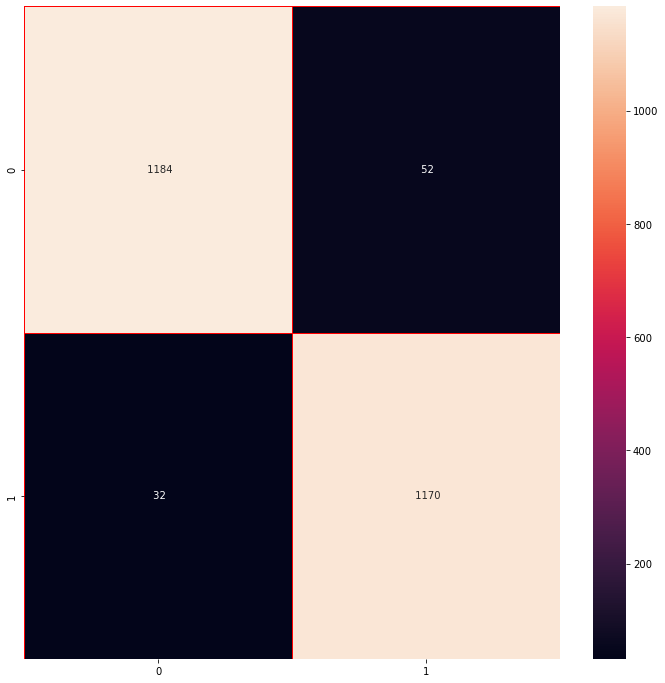

In [86]:
#Confuction Matrix for evaluation for classification model with true class labels.
from sklearn.metrics import confusion_matrix

y_pred = y_acc_test_gini

cm = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize = (12,12))

sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ' .0f', ax=ax)
plt.show()

#1184 True negatives, 1170 true positives, 52 false positives, 32 false negatives.
#Correctly identified 1170 poisonous mushrooms, 1184 edible ones, mis classified 52 edible (Type I error), 32 poisonous mushrooms (Type II Errors) - Conclude the model has effectively met the objective.


## Classification Report & F1 Score

In [79]:
#Classification Report & F1
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

#All indicator exceed .95, confidently conclude the model is functioning in high efficiency.

              precision    recall  f1-score      support
0              0.973684  0.957929  0.965742  1236.000000
1              0.957447  0.973378  0.965347  1202.000000
accuracy       0.965546  0.965546  0.965546     0.965546
macro avg      0.965566  0.965653  0.965544  2438.000000
weighted avg   0.965679  0.965546  0.965547  2438.000000


In [80]:
from sklearn.metrics import  f1_score

f1_score_val = f1_score(y_test, y_pred)
f1_score_rounded = round(f1_score_val, 3)
print("F1 Score is", f1_score_rounded)

F1 Score is 0.965


# Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rf.fit(x_train, y_train)

y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

from sklearn.metrics import accuracy_score

print("Training Accuracy: {:.2%}".format(accuracy_score(y_train, y_pred_train_rf)))
print("Testing Accuracy: {:.2%}".format(accuracy_score(y_test, y_pred_test_rf)))


Training Accuracy: 98.89%
Testing Accuracy: 98.73%


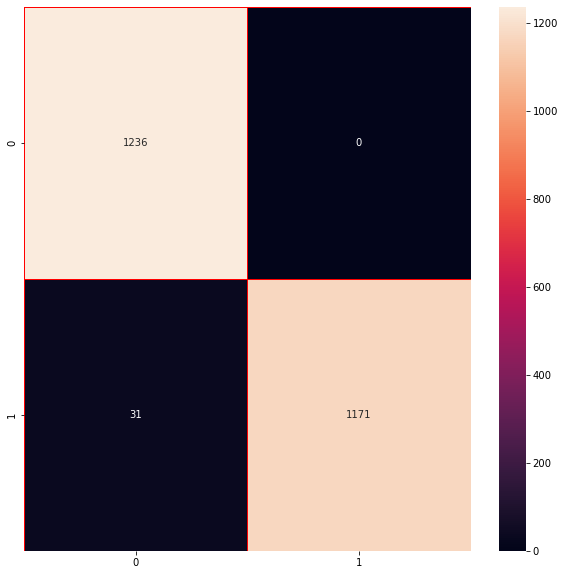

In [82]:
random_forest_pred = y_pred_test_rf
random_forest_true = y_test

cm = confusion_matrix(random_forest_true, random_forest_pred)
f,ax = plt.subplots(figsize = (10,10))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.show()

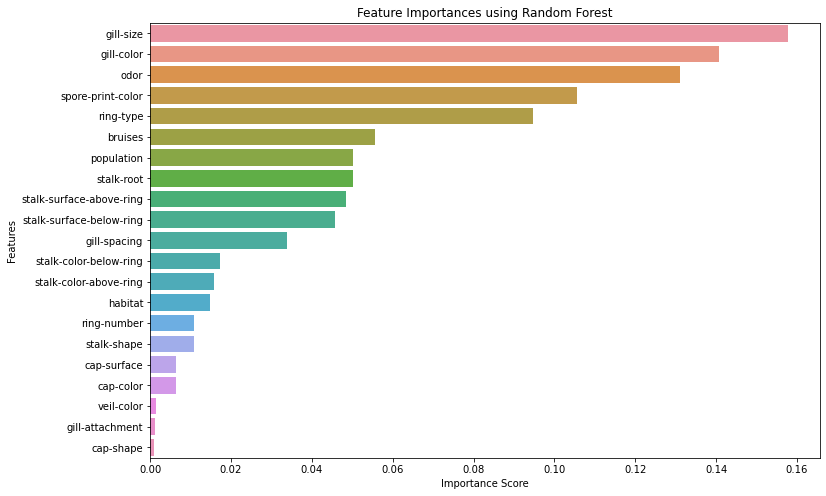

Top 10 Features: Index(['gill-size', 'gill-color', 'odor', 'spore-print-color', 'ring-type',
       'bruises', 'population', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring'],
      dtype='object')


In [83]:
#Extract Feature Importances
feature_importances = rf.feature_importances_

#Rank Features Based on Importance
sorted_idx = np.argsort(feature_importances)[::-1]
features = df.drop(['class'], axis=1).columns

#Visualize Feature Importances
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[sorted_idx], y=features[sorted_idx])
plt.title('Feature Importances using Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

#Select Top Features 
#Top 10 features
top_features = features[sorted_idx][:10]
print("Top 10 Features:", top_features)


Furthering the analysis with Random Forest, we've narrowed down to gill-size, gill-color, odor, spore-print-color as a feature importance for our objective.